In [35]:
!pip install requirements.txt

ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
ERROR: No matching distribution found for requirements.txt


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf

In [37]:
# loading in the data
churn_data = pd.read_csv("dataset/cell2celltrain.csv", index_col = 0, skipinitialspace=True)
#churn_data.head()

In [38]:
print(churn_data.info())
print(len(churn_data.columns))

target_col = ["Churn"]
cat_cols = churn_data.nunique()[churn_data.nunique() < 20].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
for i in cat_cols:
    print(churn_data[i].unique())

#print("Categorical Columns...")
#print(cat_cols)
    
num_cols   = [x for x in churn_data.columns if x not in cat_cols + target_col]
#print("Numerical Feature...")
#print(num_cols)
#churn_data = churn_data.drop(axis = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71047 entries, 3000002 to 3399986
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  object 
 1   MonthlyRevenue             70831 non-null  float64
 2   MonthlyMinutes             70831 non-null  float64
 3   TotalRecurringCharge       70831 non-null  float64
 4   DirectorAssistedCalls      70831 non-null  float64
 5   OverageMinutes             70831 non-null  float64
 6   RoamingCalls               70831 non-null  float64
 7   PercChangeMinutes          70545 non-null  float64
 8   PercChangeRevenues         70545 non-null  float64
 9   DroppedCalls               71047 non-null  float64
 10  BlockedCalls               71047 non-null  float64
 11  UnansweredCalls            71047 non-null  float64
 12  CustomerCareCalls          71047 non-null  float64
 13  ThreewayCalls              71047 non-n

In [39]:
churn_data.nunique().to_frame().transpose()

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0      2           14266            2898                   223   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                    157             823           609               2442   

   PercChangeRevenues  DroppedCalls  ...  ReferralsMadeBySubscriber  \
0                3208           304  ...                         13   

   IncomeGroup  OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0           10               2                         16            16   

   MadeCallToRetentionTeam  CreditRating  PrizmCode  Occupation  MaritalStatus  
0                        2             7          4           8              3  

[1 rows x 57 columns]

Churn                        20000
MonthlyRevenue                 216
MonthlyMinutes                 216
TotalRecurringCharge           216
DirectorAssistedCalls          216
OverageMinutes                 216
RoamingCalls                   216
PercChangeMinutes              502
PercChangeRevenues             502
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                     28
Handsets                         1
HandsetModels                    1
CurrentEquipmentDays

Text(0.5, 1.0, 'Missing Data Plot')

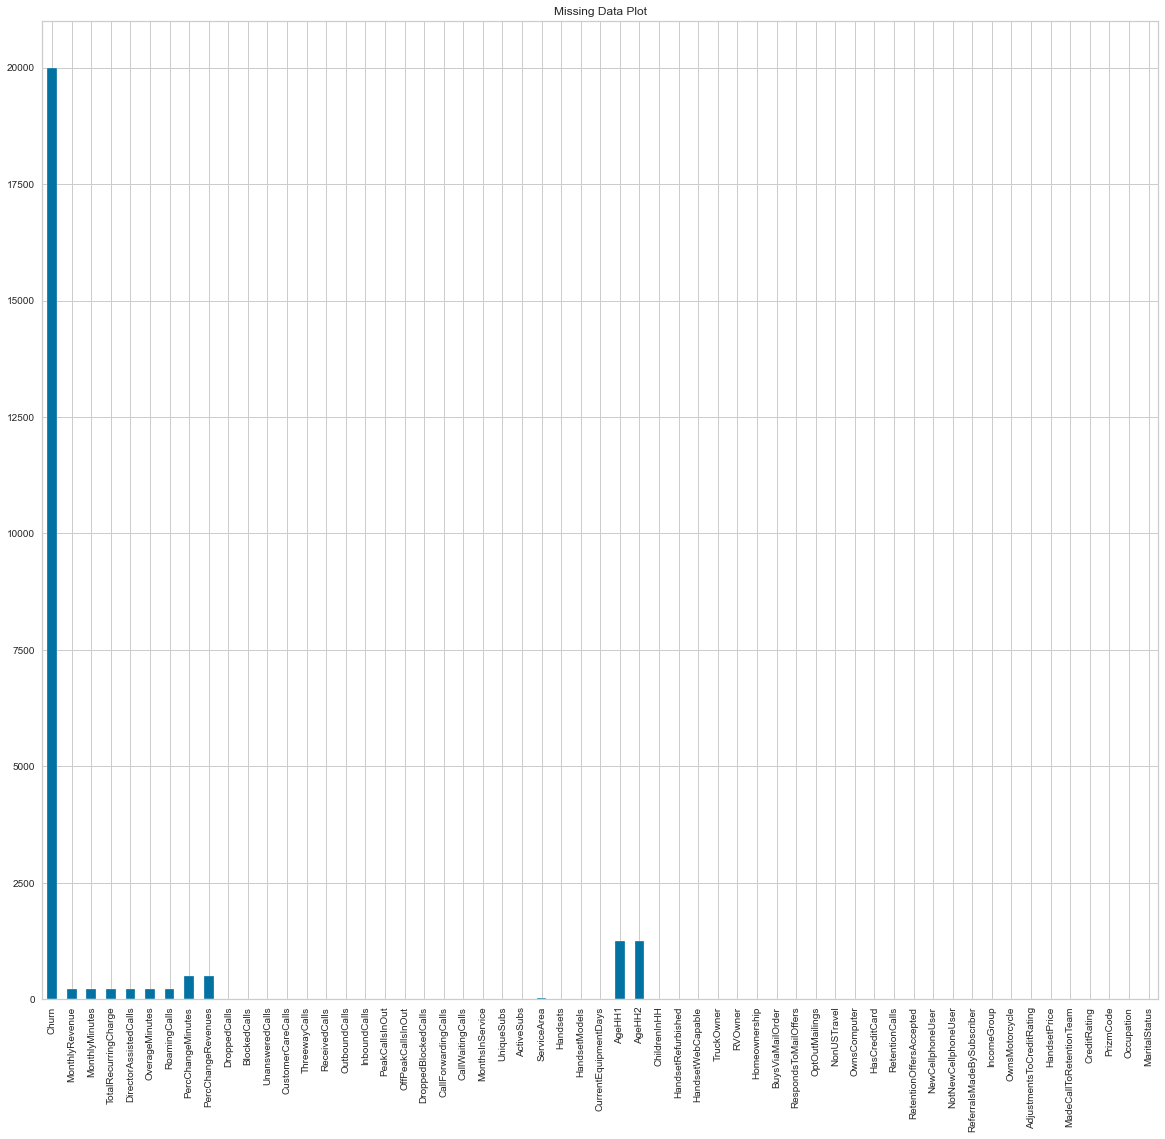

In [40]:
plt.figure(figsize = (20, 18))
churn_data.isna().sum().plot(kind = "bar")
print(churn_data.isna().sum())
plt.title("Missing Data Plot")

In [41]:
def seperate(df):
    categorical, numerical = list(), list()
    for col, col_type in df.dtypes.iteritems():
        
        if col_type == 'O':
            categorical.append(col)
        else:
            numerical.append(col)
    return categorical, numerical

cat_cols, num_cols = seperate(churn_data.drop(["Churn"], axis = 1))
print(cat_cols)

['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']


In [42]:
print(num_cols)

['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']


In [43]:
#sns.pairplot(churn_data)

In [44]:
# Customer attrition in the data

import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode()#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import os


lab = churn_data["Churn"].value_counts().keys().tolist()
val = churn_data["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'crimson' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# Variable Distribution in customer Attrition

plt.figure(figsize=(8,10))

for k, i in enumerate(num_cols):
    sns.boxplot(x='Churn', y = i ,data=churn_data, palette='mako',showfliers=False)

    plt.xlabel(i, fontsize=15, labelpad=2)
    plt.ylabel('Churn', fontsize=15, labelpad=6)
    plt.title(i + 'Distribution showing Churn Status', fontsize=20, pad=6);
    plt.show()

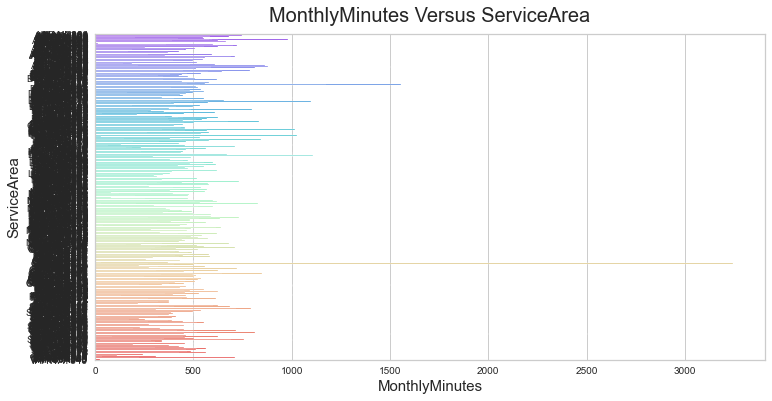

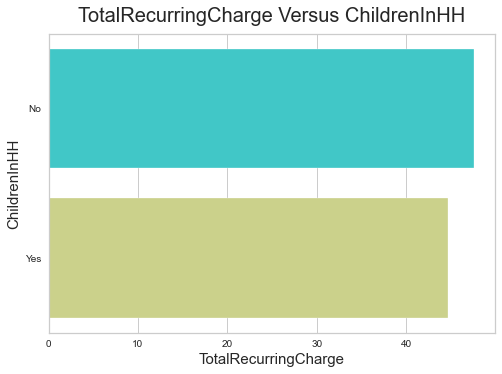

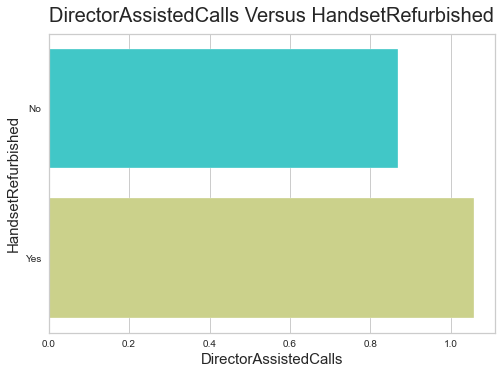

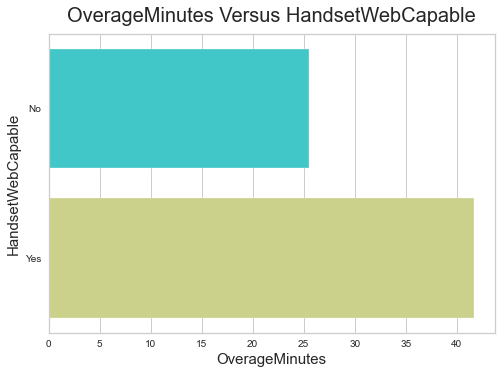

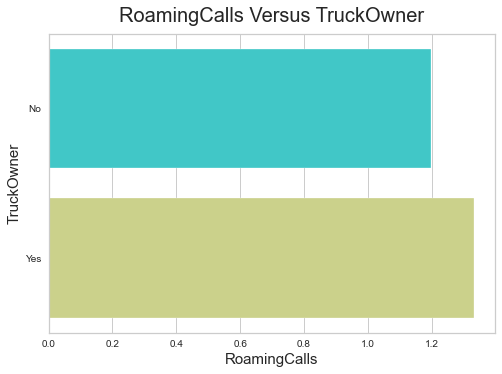

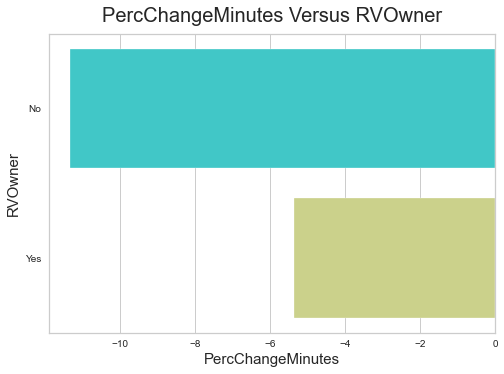

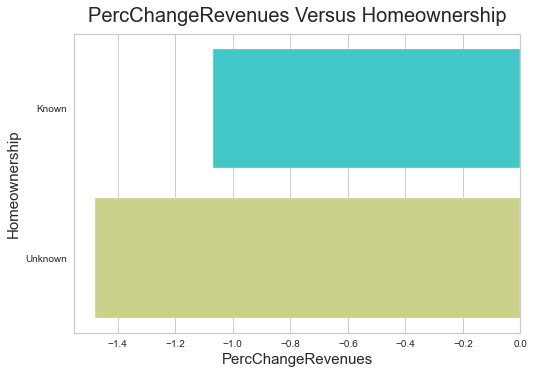

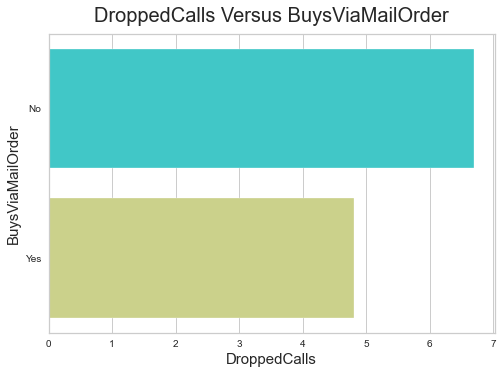

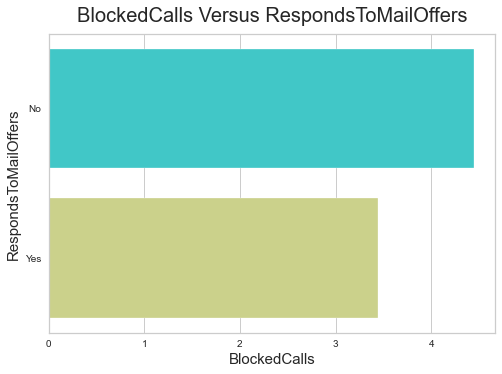

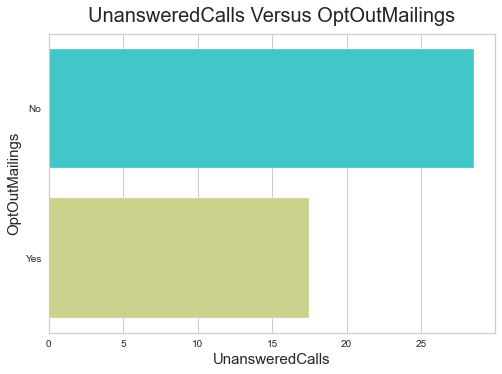

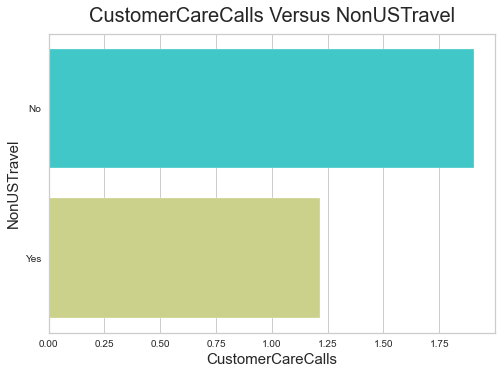

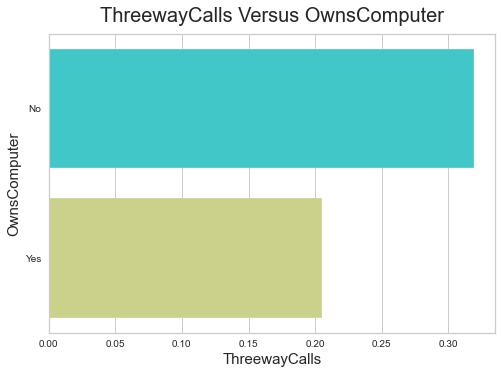

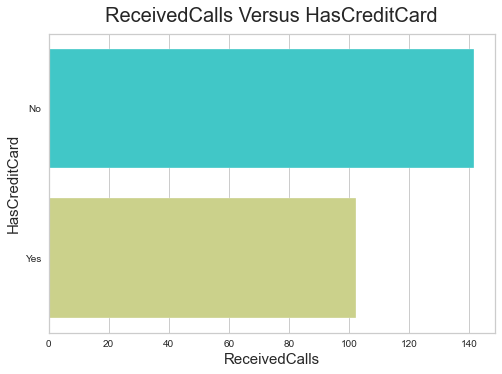

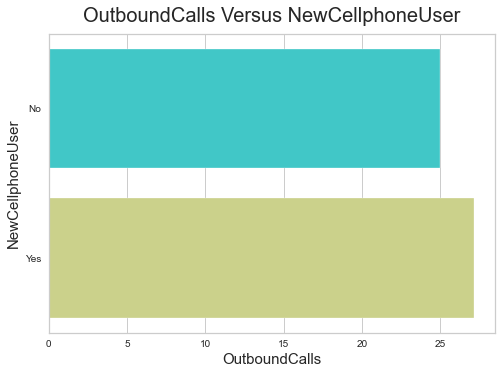

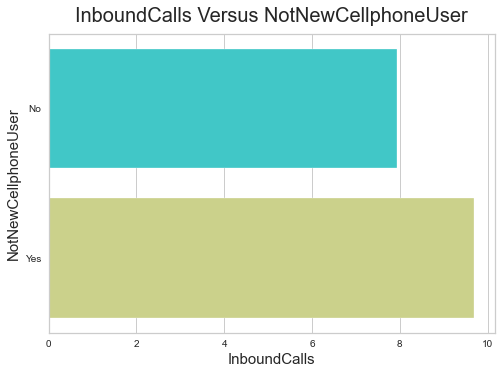

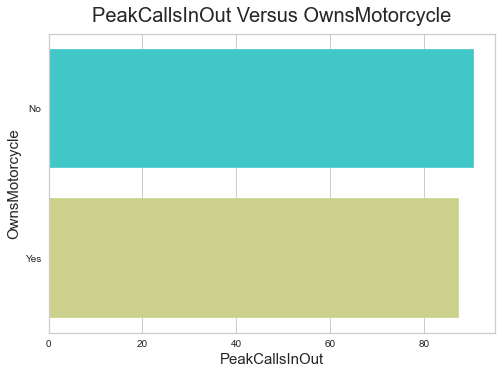

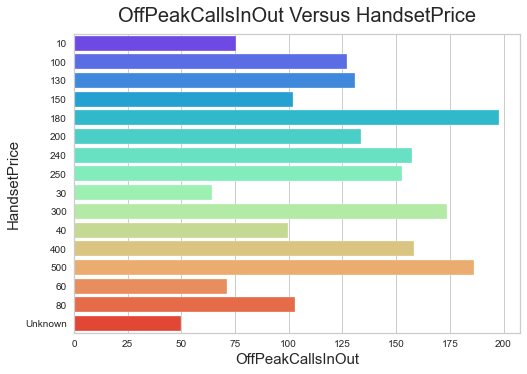

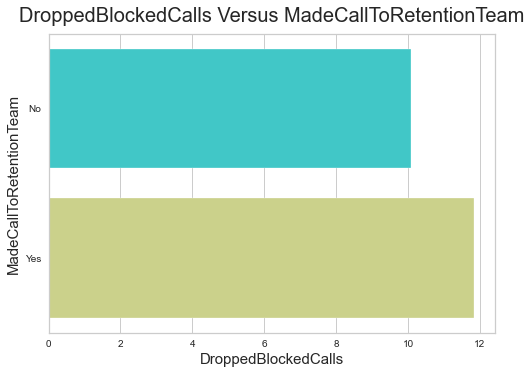

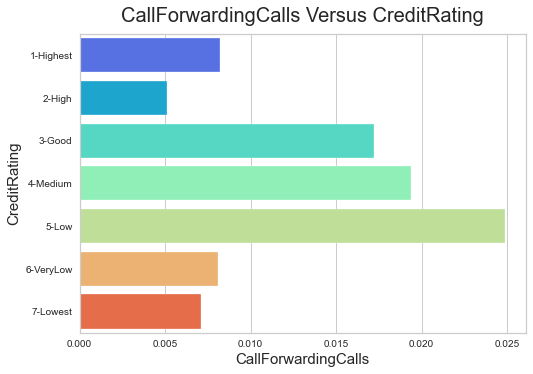

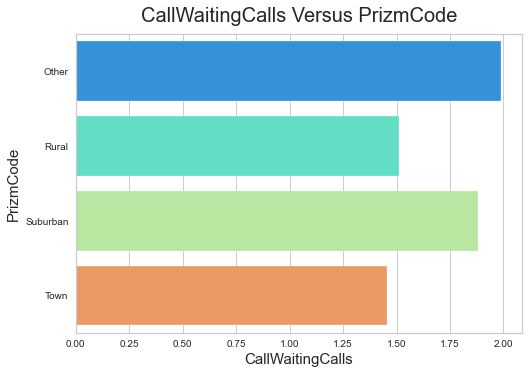

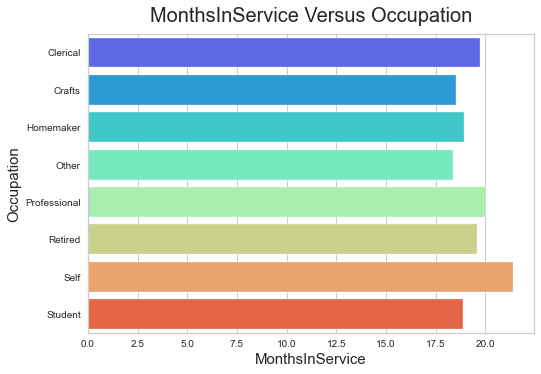

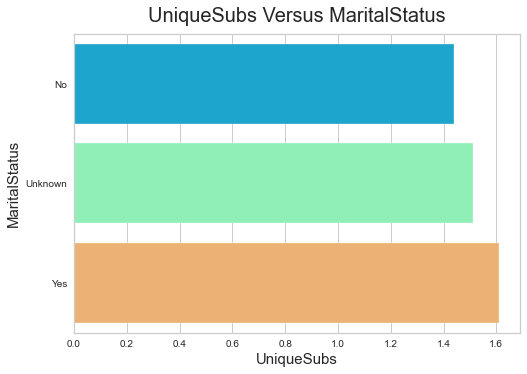

In [45]:
# On an average, interest rates are highest for clients seeking loans for medical reasons, 
# followed by business and other reasons
plt.figure(figsize=(12,6))
for i in range(len(cat_cols)):
    
    
    data = churn_data.groupby(cat_cols[i])[num_cols[i+1]].mean()

    sns.barplot(x=data.values, y=data.index, palette='rainbow')

    plt.xlabel(num_cols[i+1], fontsize=15)
    plt.ylabel(cat_cols[i], fontsize=15)
    plt.title(num_cols[i+1] + ' ' + 'Versus' + ' ' + cat_cols[i], fontsize=20, pad=12);
    plt.show()

In [46]:
churn_data.describe().transpose()

count        mean         std      min     25%  \
MonthlyRevenue             70831.0   58.852853   44.243566    -6.17   33.64   
MonthlyMinutes             70831.0  525.726250  530.136184     0.00  158.00   
TotalRecurringCharge       70831.0   46.862899   23.915000   -11.00   30.00   
DirectorAssistedCalls      70831.0    0.894817    2.197577     0.00    0.00   
OverageMinutes             70831.0   40.087730   96.349599     0.00    0.00   
RoamingCalls               70831.0    1.222315    9.081089     0.00    0.00   
PercChangeMinutes          70545.0  -10.845304  255.314034 -3875.00  -83.00   
PercChangeRevenues         70545.0   -1.204730   38.770236 -1107.70   -7.10   
DroppedCalls               71047.0    6.009567    9.006656     0.00    0.70   
BlockedCalls               71047.0    4.066459   10.671180     0.00    0.00   
UnansweredCalls            71047.0   28.355800   38.904117     0.00    5.30   
CustomerCareCalls          71047.0    1.864880    5.161165     0.00    0.00   
ThreewayCalls              71047.0    0.297879    1.162076     0.00    0.00   
ReceivedCalls              71047.0  114.935377  166.305542     0.00    8.40   
OutboundCalls              71047.0   25.396273   35.147648     0.00    3.30   
InboundCalls               71047.0    8.175988   16.519548     0.00    0.00   
PeakCallsInOut             71047.0   90.580963  104.914971     0.00   23.00   
OffPeakCallsInOut          71047.0   67.818316   93.329021     0.00   11.00   
DroppedBlockedCalls        71047.0   10.149301   15.460923     0.00    1.70   
CallForwardingCalls        71047.0    0.011801    0.562252     0.00    0.00   
CallWaitingCalls           71047.0    1.851462    5.556810     0.00    0.00   
MonthsInService            71047.0   18.750827    9.787568     6.00   11.00   
UniqueSubs                 71047.0    1.529551    1.131774     1.00    1.00   
ActiveSubs                 71047.0    1.351655    0.660049     0.00    1.00   
Handsets                   71046.0    1.808617    1.336120     1.00    1.00   
HandsetModels              71046.0    1.561791    0.908280     1.00    1.00   
CurrentEquipmentDays       71046.0  380.265631  254.294692    -5.00  204.00   
AgeHH1                     69803.0   31.375113   22.082195     0.00    0.00   
AgeHH2                     69803.0   21.157715   23.917586     0.00    0.00   
RetentionCalls             71047.0    0.037004    0.205823     0.00    0.00   
RetentionOffersAccepted    71047.0    0.017918    0.141485     0.00    0.00   
ReferralsMadeBySubscriber  71047.0    0.050854    0.290444     0.00    0.00   
IncomeGroup                71047.0    4.334229    3.137063     0.00    1.00   
AdjustmentsToCreditRating  71047.0    0.053162    0.374988     0.00    0.00   

                              50%     75%      max  
MonthlyRevenue              48.53   71.03  1223.38  
MonthlyMinutes             366.00  722.00  7668.00  
TotalRecurringCharge        45.00   60.00   400.00  
DirectorAssistedCalls        0.25    0.99   159.39  
OverageMinutes               2.00   41.00  4321.00  
RoamingCalls                 0.00    0.30  1112.40  
PercChangeMinutes           -5.00   66.00  5192.00  
PercChangeRevenues          -0.30    1.60  2483.50  
DroppedCalls                 3.00    7.70   221.70  
BlockedCalls                 1.00    3.70   384.30  
UnansweredCalls             16.30   36.70   848.70  
CustomerCareCalls            0.00    1.70   365.70  
ThreewayCalls                0.00    0.30    66.00  
ReceivedCalls               52.50  154.10  3287.20  
OutboundCalls               13.70   34.00   644.30  
InboundCalls                 2.00    9.30   519.30  
PeakCallsInOut              62.00  121.15  2090.70  
OffPeakCallsInOut           35.70   88.70  1572.70  
DroppedBlockedCalls          5.30   12.70   489.70  
CallForwardingCalls          0.00    0.00    81.30  
CallWaitingCalls             0.30    1.30   212.70  
MonthsInService             16.00   24.00    61.00  
UniqueSubs                   1.00    2.00   

# Data Pre-Processing
2. Handle Missing Values
3. Drop columns
4. One-hot encode categorical columns


In [47]:
print(churn_data.isna().sum())

Churn                        20000
MonthlyRevenue                 216
MonthlyMinutes                 216
TotalRecurringCharge           216
DirectorAssistedCalls          216
OverageMinutes                 216
RoamingCalls                   216
PercChangeMinutes              502
PercChangeRevenues             502
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                     28
Handsets                         1
HandsetModels                    1
CurrentEquipmentDays

### 2.1 Handle missing values in the `Monthly Revenue column`
- **`Fill Nans with Mean`**
- **Logic behind it**: missing values are filled in with **`mean of the column**; missing is being translated as **`unverified`**

In [48]:
churn_data['MonthlyMinutes'] = churn_data['MonthlyMinutes'].fillna(churn_data['MonthlyMinutes'].mean())
churn_data['MonthlyRevenue'] = churn_data['MonthlyRevenue'].fillna(churn_data['MonthlyRevenue'].mean())
churn_data['DirectorAssistedCalls'] = churn_data['DirectorAssistedCalls'].fillna(churn_data['DirectorAssistedCalls'].mean())
churn_data['OverageMinutes'] = churn_data['OverageMinutes'].fillna(churn_data['OverageMinutes'].mean())
churn_data['RoamingCalls'] = churn_data['RoamingCalls'].fillna(churn_data['RoamingCalls'].mean())
churn_data['PercChangeMinutes'] = churn_data['PercChangeMinutes'].fillna(churn_data['PercChangeMinutes'].mean())
churn_data['PercChangeRevenues'] = churn_data['PercChangeRevenues'].fillna(churn_data['PercChangeRevenues'].mean())

### 2.1 Handle missing values in the `Service Area column`
- **`Drop the feature`**
- **Logic behind it**:the service area feature is a column that is less unique, we have less use for it

In [49]:
churn_data = churn_data.drop(["ServiceArea"], axis = 1)

### Fill AgeHH1 with the mean

In [50]:
print(churn_data["AgeHH1"].describe().transpose())
print(churn_data["AgeHH1"].mode())

count    69803.000000
mean        31.375113
std         22.082195
min          0.000000
25%          0.000000
50%         36.000000
75%         48.000000
max         99.000000
Name: AgeHH1, dtype: float64
0    0.0
dtype: float64


In [51]:
churn_data["AgeHH1"] = churn_data["AgeHH1"].fillna(churn_data["AgeHH1"].mean())
churn_data["AgeHH2"] = churn_data["AgeHH2"].fillna(churn_data["AgeHH2"].mean())

In [52]:
plt.figure(figsize=(16,8))
churn_data['MonthlyMinutes'].groupby(churn_data['AgeHH1']).mean().plot(kind='bar',
                    title= 'Mean of Number of Monthly Minutes grouped by AgeHH1 of Customer');

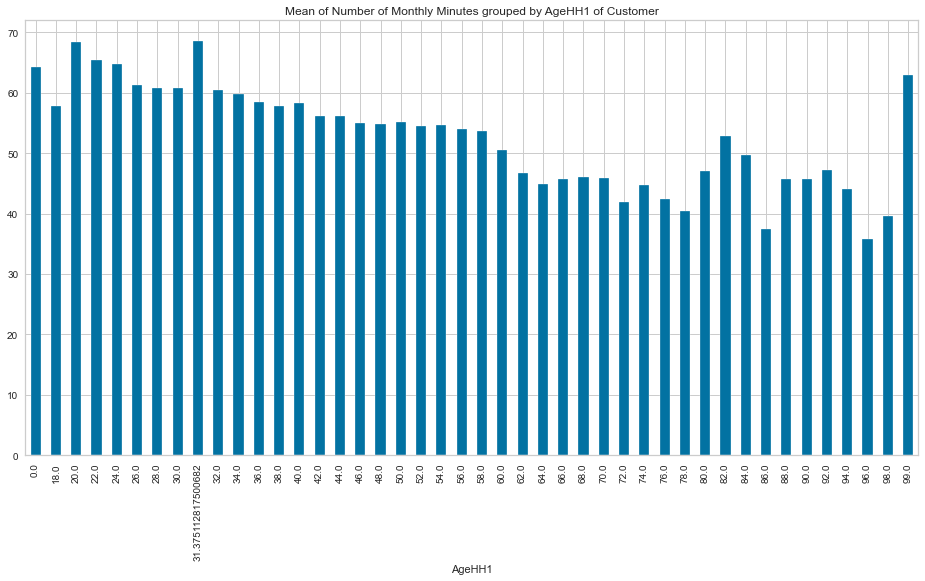

In [53]:
plt.figure(figsize=(16,8))
churn_data['MonthlyRevenue'].groupby(churn_data['AgeHH1']).mean().plot(kind='bar',
                    title= 'Mean of Number of Monthly Minutes grouped by AgeHH1 of Customer');

In [54]:
plt.figure(figsize=(16,8))
churn_data['TotalRecurringCharge'].groupby(churn_data['AgeHH1']).mean().plot(kind='bar',
                    title= 'Mean of Number of Monthly Minutes grouped by AgeHH1 of Customer');

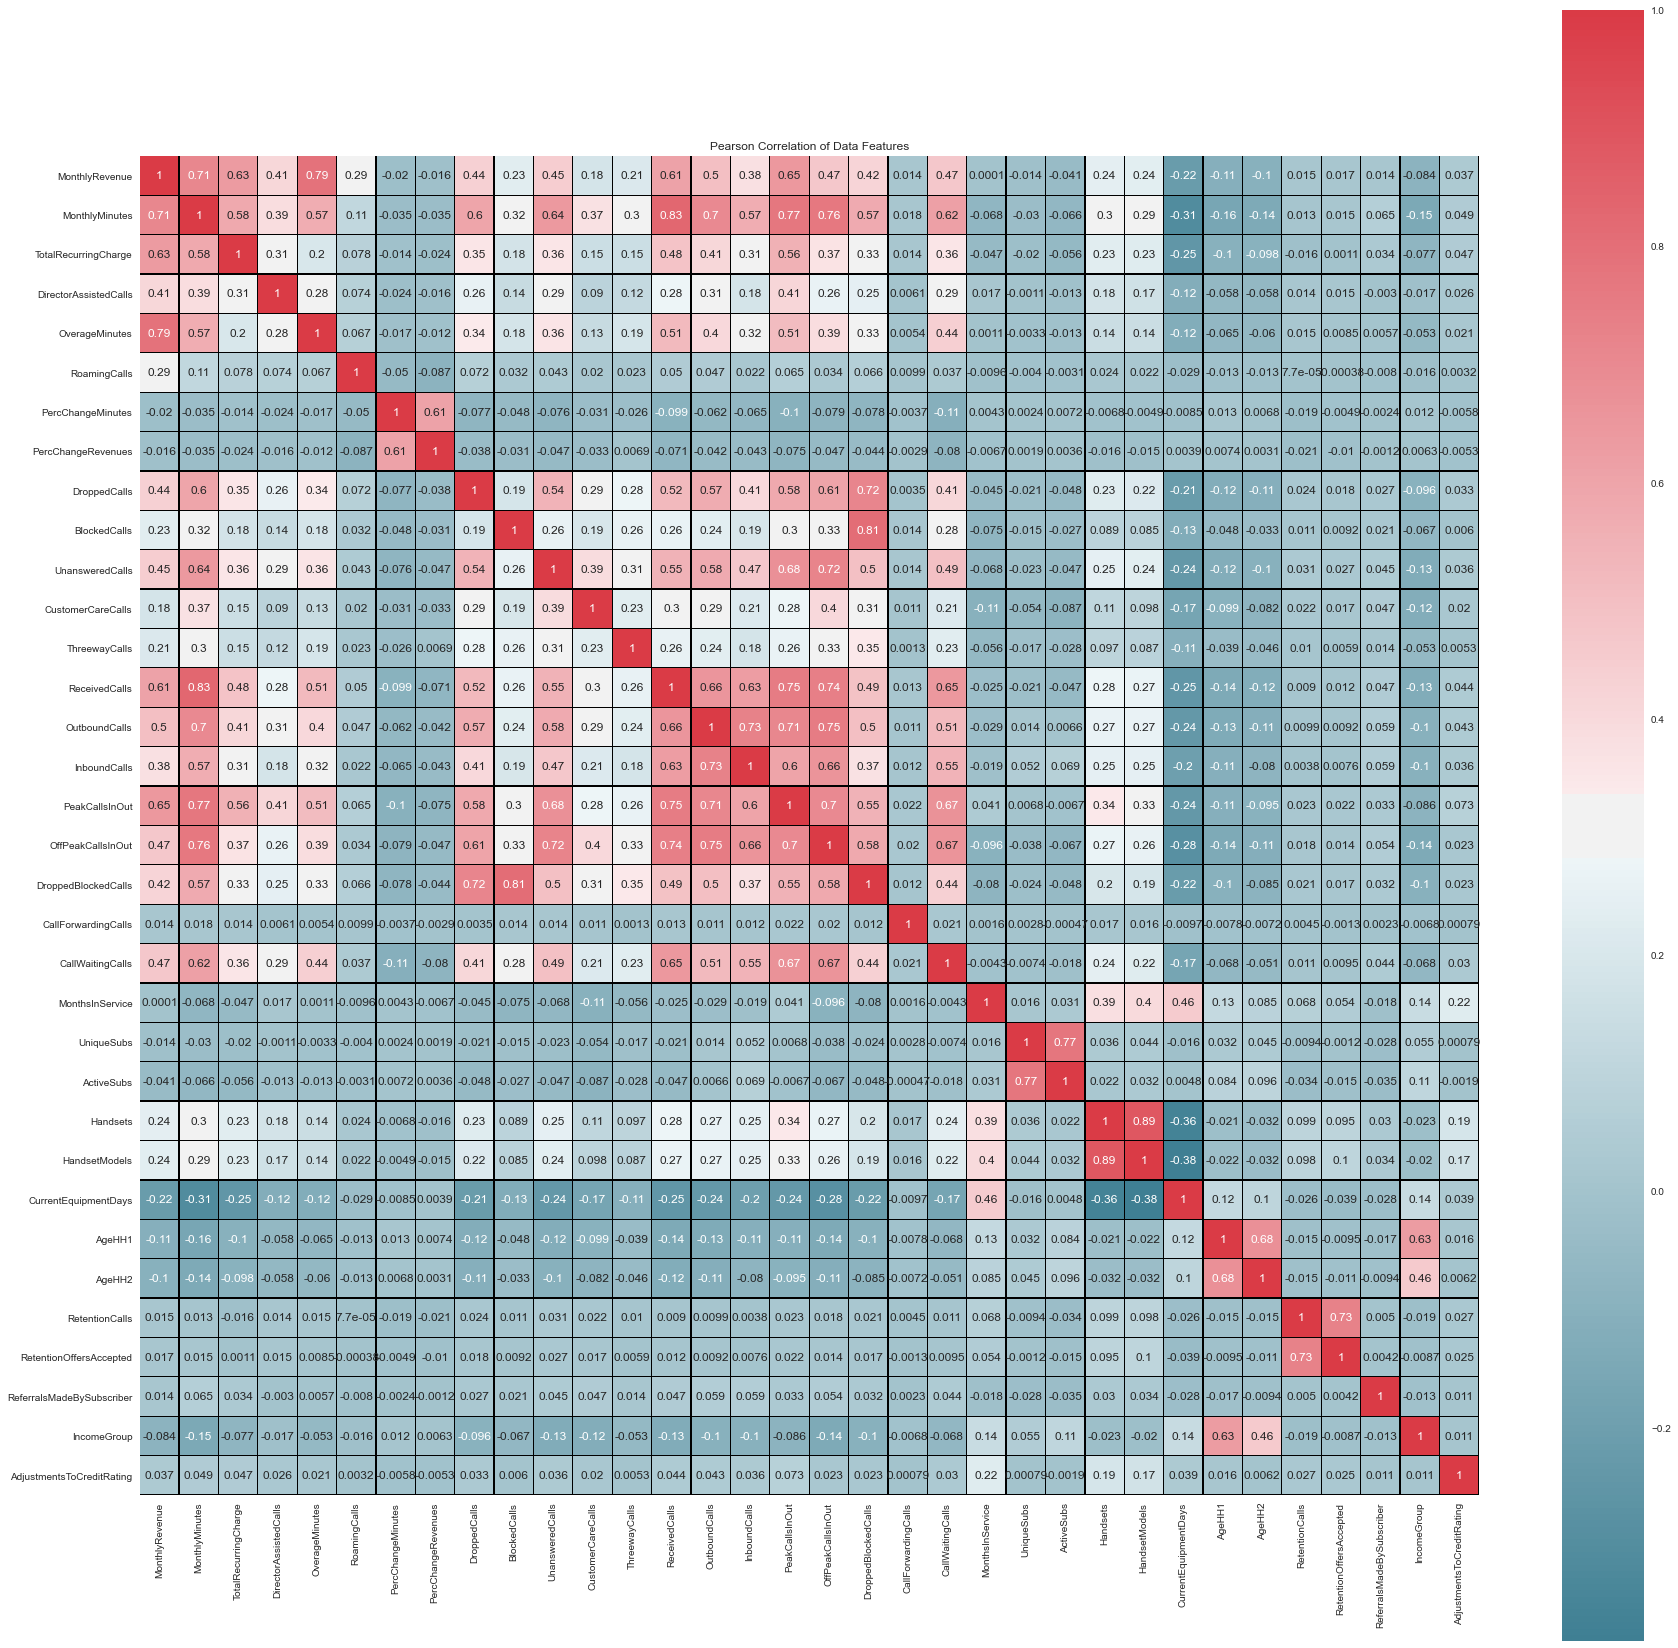

In [55]:
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Data Features')
sns.heatmap(churn_data.corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap=sns.diverging_palette(220, 10, as_cmap=True), linecolor='black', annot=True);

In [56]:
churn_data = churn_data.dropna(axis = 0);

## One Hot Encode Categorical Columns

In [57]:
from sklearn.preprocessing import StandardScaler
cat_cols_, _ = seperate(churn_data.drop(["Churn"], axis = 1))
ohe_cols = pd.get_dummies(churn_data[cat_cols_])
ohe_churn = pd.concat([churn_data, ohe_cols], axis = 1)
ohe_churn = ohe_churn.drop(cat_cols_, axis = 1)

scale = StandardScaler()
ohe_churn[_] = scale.fit_transform(ohe_churn[_])

In [58]:
ohe_churn.head()

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
CustomerID                                                               
3000002      Yes       -0.782662       -0.578757             -1.041139   
3000010      Yes       -0.940164       -0.973197             -1.250798   
3000014       No       -0.468106       -0.976971             -0.370229   
3000022       No        0.526787        1.484029              1.181250   
3000026      Yes       -0.936794       -0.992069             -1.250798   

            DirectorAssistedCalls  OverageMinutes  RoamingCalls  \
CustomerID                                                        
3000002                 -0.289537       -0.414426     -0.125915   
3000010                 -0.401718       -0.414426     -0.125915   
3000014                 -0.401718       -0.414426     -0.125915   
3000022                  0.154699       -0.414426     -0.125915   
3000026                 -0.401718       -0.414426     -0.125915   

            PercChangeMinutes  PercChangeRevenues  DroppedCalls  ...  \
CustomerID                                                       ...   
3000002             -0.566015           -0.450916     -0.587828  ...   
3000010              0.029361            0.030184     -0.632052  ...   
3000014              0.037144            0.030184     -0.665220  ...   
3000022              0.655868            0.235285      5.083904  ...   
3000026              0.044926            0.025120     -0.665220  ...   

            Occupation_Crafts  Occupation_Homemaker  Occupation_Other  \
CustomerID                                                              
3000002                     0                     0                 0   
3000010                     0                     0                 0   
3000014                     1                     0                 0   
3000022                     0                     0                 1   
3000026                     0                     0                 0   

            Occupation_Professional  Occupation_Retired  Occupation_Self  \
CustomerID                                                                 
3000002                           1                   0                0   
3000010                           1                   0                0   
3000014                           0                   0                0   
3000022                           0                   0                0   
3000026                           1                   0                0   

            Occupation_Student  MaritalStatus_No  MaritalStatus_Unknown  \
CustomerID                                                                
3000002                      0                 1                      0   
3000010                      0                 0                      0   
3000014                      0                 0                      0   
3000022                      0                 1                      0   
3000026                      0                 0                      0   

            MaritalStatus_Yes  
CustomerID                     
3000002                     0  
3000010                     1  
3000014                     1  
3000022                     0  
3000026                     1  

[5 rows x 105 columns]

In [59]:
X_df = ohe_churn.copy()

In [60]:
X = ohe_churn.drop(["Churn"], axis = 1).values
y = ohe_churn['Churn']
print(X.shape)
print(y.shape)

# Labeling our target feature, Yes:1, No:2
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

y = label.fit_transform(y)
print(y)

(50890, 104)
(50890,)
[1 1 0 ... 0 1 0]


## Use an ExtraTreeClassifier to find most important features

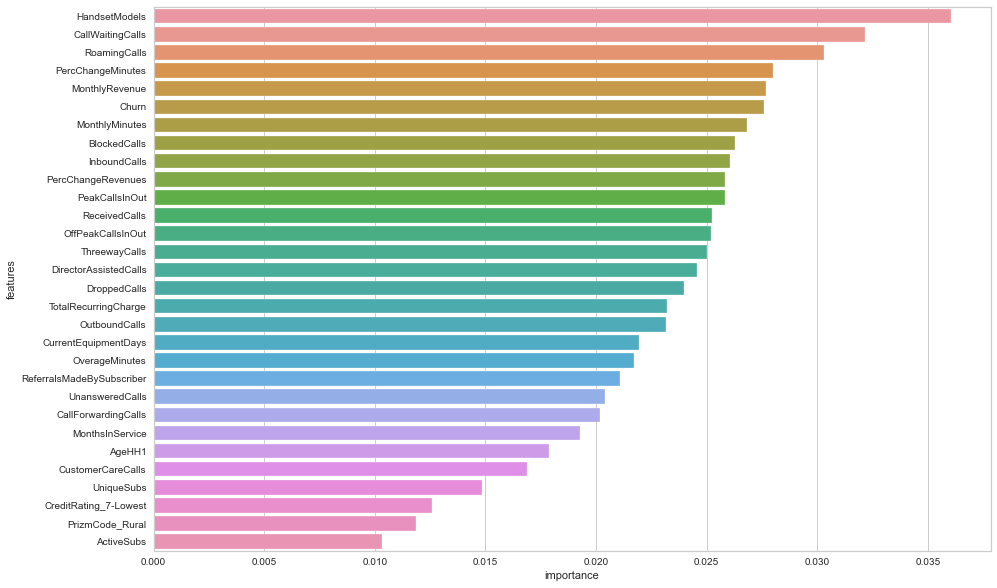

In [61]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Initialize a random forest estimator
forest = ExtraTreesClassifier(n_estimators=50,random_state=0)

# Fit the input matrix and target values to the classifier
forest.fit(X, y)

# Retrieve the computed feature importance
importances = forest.feature_importances_

# Plot the feature importance
plot_data = pd.DataFrame({'features' : pd.Series(X_df.columns),'importance' : pd.Series(importances)})
plt.figure(figsize=(15,10))
plot_data = plot_data.sort_values('importance',ascending=False)
plot_data = plot_data[plot_data['importance'] > 0.01]
ax = sns.barplot(x=plot_data['importance'],y=plot_data['features'],)

In [62]:
# Use the most important features [mif] as X
mifeat_df_X = ohe_churn[plot_data.iloc[:,0].values]
mifeat_df_X = mifeat_df_X.drop(["Churn"], axis = 1)

In [63]:
# Split data
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mifeat_df_X, y, test_size=0.25, random_state=3005)



#  Model Building
## Baseline Model

LogisticRegression(C=0.1, multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83      9127
           1       0.45      0.01      0.02      3596

    accuracy                           0.72     12723
   macro avg       0.58      0.50      0.43     12723
weighted avg       0.64      0.72      0.60     12723

Accuracy   Score :  0.7166548769944195
[[9079   48]
 [3557   39]]
Area under curve :  0.5027931312356242 



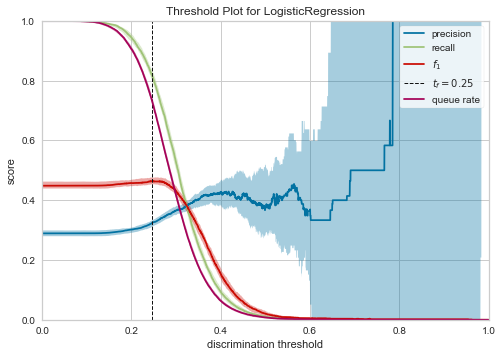

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
import pickle
import joblib


##seperating dependent and independent variables
cols    = [i for i in ohe_churn.drop(["Churn"], axis = 1).columns]


    
def churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot, model_name = "model.sav") :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)  
    #features = list(training_x.columns)
    #print(features)
    joblib.dump(algorithm, "model.pkl")
    #joblib.dump(features, "features.pkl")
    
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    print(conf_matrix)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,
                        name = "confusion matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

churn_prediction(logit,X_train,X_test,y_train,y_test,
                         cols,"coefficients",threshold_plot = True)



## Synthetic Minority Oversampling TEchnique (SMOTE)
* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

LogisticRegression(C=0.1, multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.56      0.65      9127
           1       0.34      0.59      0.43      3596

    accuracy                           0.57     12723
   macro avg       0.56      0.57      0.54     12723
weighted avg       0.65      0.57      0.59     12723

Accuracy   Score :  0.5655898766014305
[[5083 4044]
 [1483 2113]]
Area under curve :  0.5722581809061186 



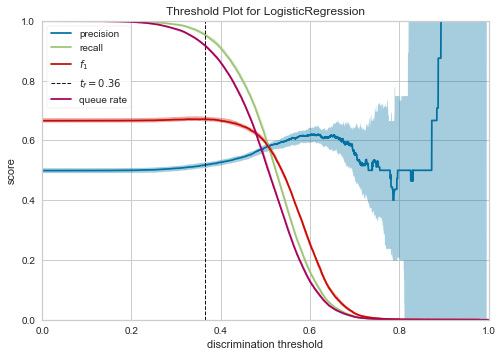

In [65]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=3005, sampling_strategy = 'minority')
X_train_bal, y_train_bal = smote.fit_sample(X_train, y_train)

logit_smote  = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

churn_prediction(logit_smote,X_train_bal,X_test,y_train_bal,y_test,
                         cols,"coefficients",threshold_plot = True)

## <a id='5.3'>5.3. Recursive Feature Elimination</a>
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

(54244, 29)
LogisticRegression(C=0.1, multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.56      0.65      9127
           1       0.34      0.59      0.43      3596

    accuracy                           0.57     12723
   macro avg       0.56      0.57      0.54     12723
weighted avg       0.65      0.57      0.59     12723

Accuracy   Score :  0.5655898766014305
[[5083 4044]
 [1483 2113]]
Area under curve :  0.5722581809061186 



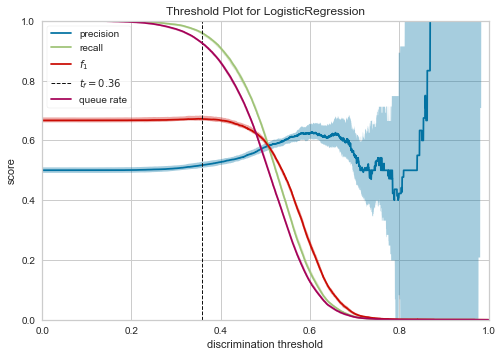

In [67]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(X_train_bal,y_train_bal.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in mifeat_df_X.columns],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rf_X = X_train_bal
train_rf_Y = y_train_bal
test_rf_X  = X_test
test_rf_Y  = y_test
print(train_rf_X.shape)

logit_rfe = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

DecisionTreeClassifier(max_depth=5)

 Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.42      0.55      9127
           1       0.33      0.72      0.45      3596

    accuracy                           0.51     12723
   macro avg       0.56      0.57      0.50     12723
weighted avg       0.66      0.51      0.52     12723

Accuracy   Score :  0.5060913306610076
[[3845 5282]
 [1002 2594]]
Area under curve :  0.5713172958083882 



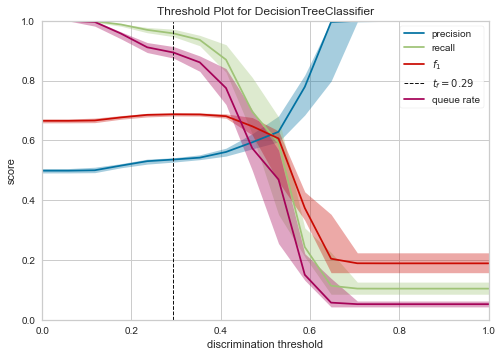

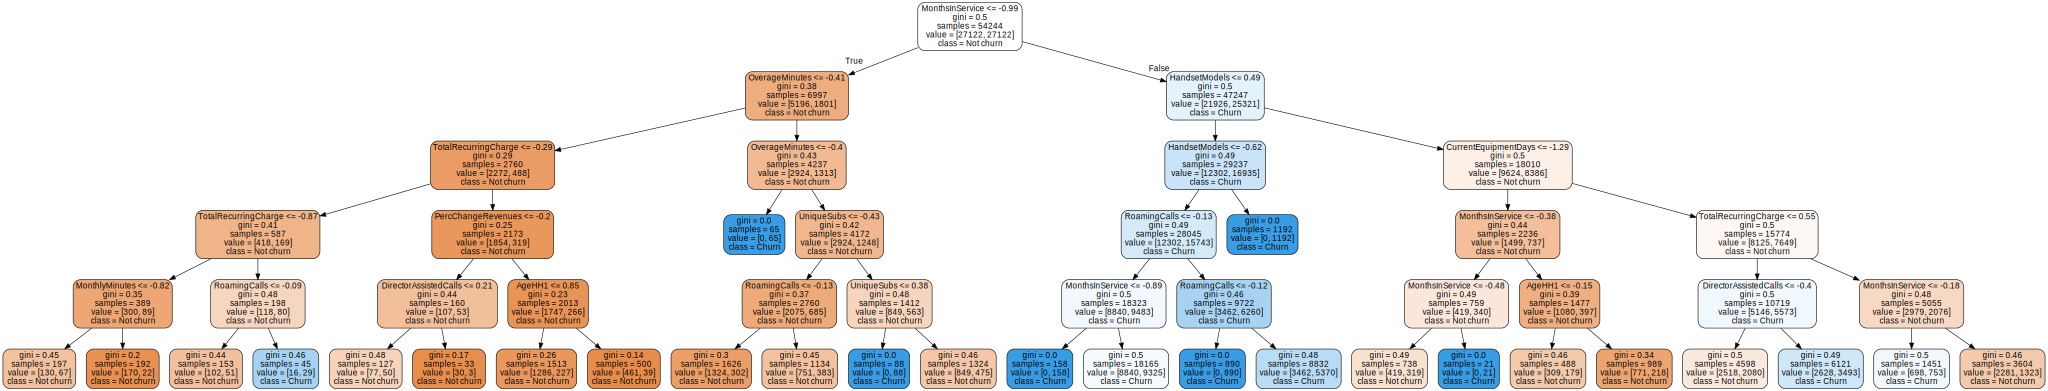

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

features = list(mifeat_df_X.columns)
def plot_decision_tree(train_X, train_Y, test_X, test_Y,columns,maximum_depth,criterion_type,
                       split_type,model_performance = None):
    

    
    #model
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(train_X, train_Y)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
    
    #model performance
    if model_performance == True :
        churn_prediction(dt_classifier, X_train_bal,test_X,
                                 train_Y,test_Y,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(X_train_bal, y_train_bal, X_test, y_test, features, 5, "gini", "best", model_performance = True)

## <a id='5.8'>5.8. A random forest classifier.</a>
* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement .
* Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three  for each tree. Each tree produced is slightly different from other.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model
features = list(mifeat_df_X.columns)
def plot_tree_randomforest(train_X, train_Y, test_X, test_Y, columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    
    #train and test datasets
    rf_x     = train_X
    rf_y     = train_Y
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    #estimated_tree = rfc.estimators_[estimated_tree]
    
   
    #display(graph)
    
    #model performance
    if model_performance == True :
        churn_prediction(rfc,
                                 rf_x,test_X,
                                 rf_y,test_Y,
                                 columns,"features",threshold_plot = True)
        


plot_tree_randomforest(X_train_bal, y_train_bal, X_test, y_test, features,120,99,3,"entropy",True)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=120)

 Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.54      0.64      9127
           1       0.35      0.62      0.45      3596

    accuracy                           0.56     12723
   macro avg       0.57      0.58      0.54     12723
weighted avg       0.66      0.56      0.59     12723

Accuracy   Score :  0.5647253006366423
[[4962 4165]
 [1373 2223]]
Area under curve :  0.5809242687509453 



## Hyperparameter Tunning For RandomForest

* Remove from markdown to use

from sklearn.model_selection import GridSearchCV
hyperparameters = {'max_features':['auto'],
                   'max_depth': [None, 1, 10, 20],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [80, 100, 120],
                   'criterion': ['gini', 'entropy']}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, hyperparameters, cv = 10, n_jobs = -1, verbose = 2)
rf_grid.fit(X_train_bal, y_train_bal)
+

rf_grid.best_params_

## <a id='5.10'>5.10. Support Vector Machine</a>
* “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.   it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes 

In [ ]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=0.1, cache_size=7000, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = [i for i in mifeat_df_X.columns]
churn_prediction(svc_lin,X_train_bal,X_test,y_train_bal,y_test,
                         cols,"coefficients",threshold_plot = False)

#  Model Performances
## model performance metrics

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,X_train_bal,X_test,y_train_bal,y_test,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,X_train_bal,X_test,y_train_bal,y_test,
                      "Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,X_train_bal,X_test,y_train_bal,y_test,
                      "Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,X_train_bal,X_test,y_train_bal,y_test,
                      "Decision Tree")

rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model5 = model_report(rfc,X_train_bal,X_test,y_train_bal,y_test,
                      "Random Forest Classifier")
model6 = model_report(svc_lin,X_train_bal,X_test,y_train_bal,y_test,
                      "SVM Classifier Linear")
#model7 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,
                    #  "SVM Classifier RBF")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

## <a id='6.2'>6.2. Compare model metrics</a>

In [ ]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)



## <a id='6.3'>6.3. Confusion matrices for models</a>

In [ ]:
import itertools
lst    = [logit,logit_smote,decision_tree,rfc,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods):
    if j == None:
        break
    else:
        plt.subplot(4,3, j+1)
        predictions = i.predict(X_test)
        conf_matrix = confusion_matrix(predictions,y_test)
        sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                    xticklabels=["not churn","churn"],
                    yticklabels=["not churn","churn"],
                    linewidths = 2,linecolor = "w",cmap = "Set1")
        plt.title(k,color = "b")
        plt.subplots_adjust(wspace = .3,hspace = .3)

## <a id='6.4'>6.4. ROC - Curves  for models</a>

In [ ]:
lst    = [logit,logit_smote,decision_tree,rfc,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','Random Forest Classifier',
          'SVM Classifier Linear']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

## <a id='6.5'>6.5. Precision recall curves</a>

In [ ]:
### from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve


lst    = [logit,logit_smote,decision_tree,rfc,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','Random Forest Classifier',
          'SVM Classifier Linear']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    if j == None:
        break
    else:
        qx = plt.subplot(4,3,j+1)
        probabilities = i.predict_proba(X_test)
        predictions   = i.predict(X_test)
        recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
        plt.plot(recall,precision,linewidth = 1.5,
                 label = ("avg_pcn : " + 
                          str(np.around(average_precision_score(y_test,predictions),3))))
        plt.plot([0,1],[0,0],linestyle = "dashed")
        plt.fill_between(recall,precision,alpha = .2)
        plt.legend(loc = "lower left",
                   prop = {"size" : 10})
        qx.set_facecolor("k")
        plt.grid(True,alpha = .15)
        plt.title(k,color = "b")
        plt.xlabel("recall",fontsize =7)
        plt.ylabel("precision",fontsize =7)
        plt.xlim([0.25,1])
        plt.yticks(np.arange(0,1,.3))
